Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD


In [1]:
# Insights to be drawn -
# ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
# ● Get all TESLA cars with the model year, and model type made in Bothell City.
# ● Get all the cars that have an electric range of more than 100, and were made after
# 2015
# ● Draw plots to show the distribution between city and electric vehicle type

In [2]:
import pandas as pd

# Read the data from the link
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

In [57]:
df=pd.DataFrame(df)

### # ● Get all the cars and their types that do not qualify for clean alternative fuel vehicle


In [5]:
df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

Clean Alternative Fuel Vehicle Eligible                         60551
Eligibility unknown as battery range has not been researched    53446
Not eligible due to low battery range                           16446
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [6]:
df1 = df[df["Clean Alternative Fuel Vehicle (CAFV) Eligibility"]=="Not eligible due to low battery range"]

In [8]:
df1 = df1[['Make','Model','Electric Vehicle Type']]

In [9]:
df1.head()

,Make,Model,Electric Vehicle Type
6,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
7,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
8,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
14,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
15,KIA,NIRO,Plug-in Hybrid Electric Vehicle (PHEV)


In [10]:
import warnings
warnings.filterwarnings('ignore')

df1['name']  = df1['Make']+' '+df1['Model']
df1.drop(['Model' ,'Make'],axis=1,inplace=True)
df1 = df1.reset_index()

In [12]:
x = df1['Electric Vehicle Type']
df1.drop(['Electric Vehicle Type'],axis=1,inplace=True)

In [13]:
df1['Electric Vehicle Type'] = x

In [14]:
df1

,index,name,Electric Vehicle Type
0,6,FORD FUSION,Plug-in Hybrid Electric Vehicle (PHEV)
1,7,AUDI Q5 E,Plug-in Hybrid Electric Vehicle (PHEV)
2,8,FORD C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
3,14,FORD C-MAX,Plug-in Hybrid Electric Vehicle (PHEV)
4,15,KIA NIRO,Plug-in Hybrid Electric Vehicle (PHEV)
...,...,...,...
16441,130377,BMW 530E,Plug-in Hybrid Electric Vehicle (PHEV)
16442,130385,AUDI A3,Plug-in Hybrid Electric Vehicle (PHEV)
16443,130390,JEEP WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV)
16444,130407,TOYOTA PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV)


In [15]:
df1['Electric Vehicle Type'].value_counts()

Plug-in Hybrid Electric Vehicle (PHEV)    16437
Battery Electric Vehicle (BEV)                9
Name: Electric Vehicle Type, dtype: int64

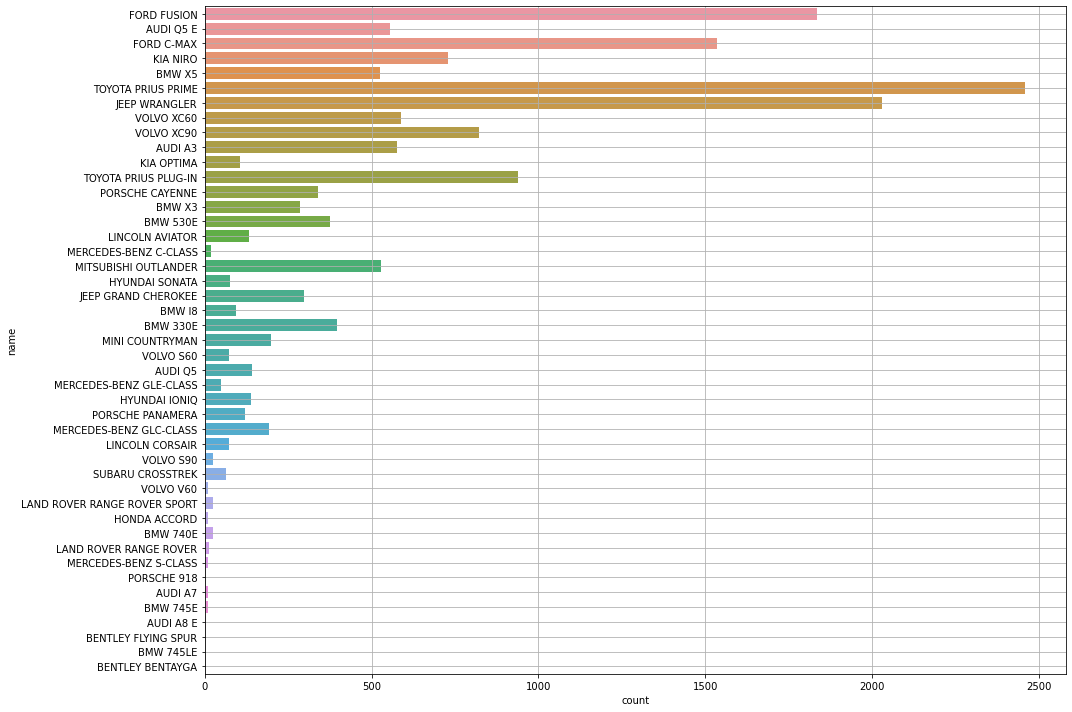

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.countplot(y = df1['name'])
plt.grid()
plt.tight_layout()

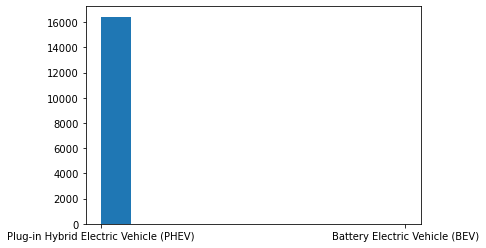

In [63]:
plt.hist(df1['Electric Vehicle Type'])
plt.show()

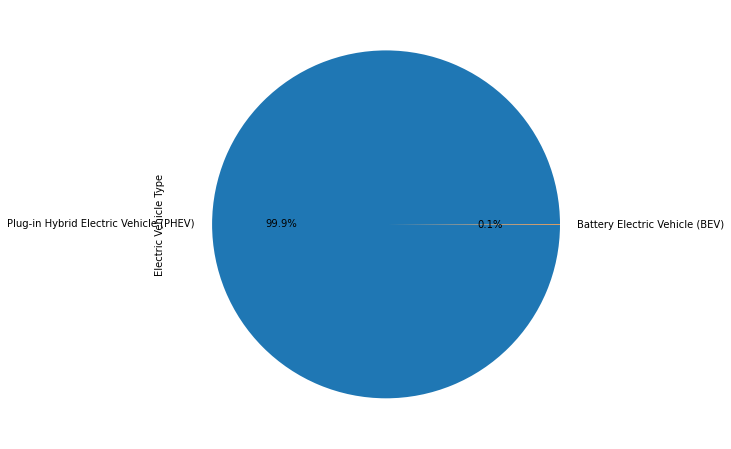

In [71]:
plt.figure(figsize=(8,8))
df1['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%')

### Get all TESLA cars with the model year, and model type made in Bothell City.

In [89]:
df2 = df[df['Make']=='TESLA']

In [91]:
df3 = df2[df2['City']=='Bothell']

In [120]:
df4 = df3[['Make','Model Year','Electric Vehicle Type']]

In [121]:
df4

,Make,Model Year,Electric Vehicle Type
39,TESLA,2020,Battery Electric Vehicle (BEV)
217,TESLA,2022,Battery Electric Vehicle (BEV)
218,TESLA,2022,Battery Electric Vehicle (BEV)
222,TESLA,2018,Battery Electric Vehicle (BEV)
292,TESLA,2017,Battery Electric Vehicle (BEV)
...,...,...,...
129778,TESLA,2019,Battery Electric Vehicle (BEV)
129954,TESLA,2021,Battery Electric Vehicle (BEV)
129976,TESLA,2014,Battery Electric Vehicle (BEV)
130295,TESLA,2022,Battery Electric Vehicle (BEV)


In [122]:
df4['Model Year']

39        2020
217       2022
218       2022
222       2018
292       2017
          ... 
129778    2019
129954    2021
129976    2014
130295    2022
130392    2018
Name: Model Year, Length: 2407, dtype: int64

In [123]:
df4['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)    2407
Name: Electric Vehicle Type, dtype: int64

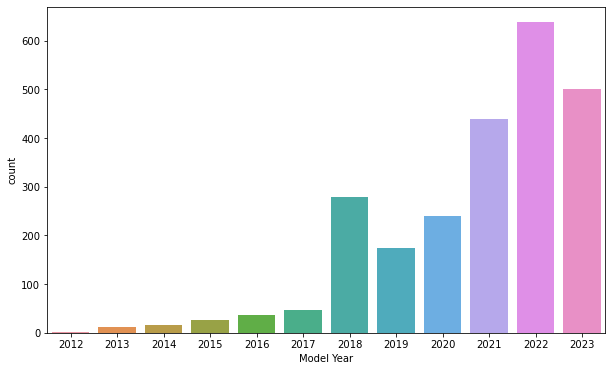

In [124]:
plt.figure(figsize=(10,6))
sns.countplot(data=df4, x = 'Model Year')

### Get all the cars that have an electric range of more than 100, and were made after 2015

In [126]:
df.head(1)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10


In [128]:
df5 = df[df['Electric Range']>100]

In [130]:
df5  = df5[df5['Model Year']>2015]

In [141]:
df5['Car'] = df5['Make']+ ' ' + df5['Model']

In [133]:
df5 = df5[['Car','Electric Range','Model Year']]

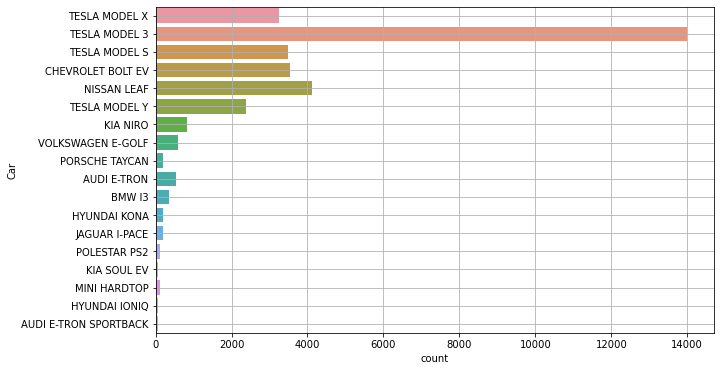

In [146]:
plt.figure(figsize=(10,6))
sns.countplot(data=df5, y='Car')
plt.grid()


### Draw plots to show the distribution between city and electric vehicle type

In [149]:
df.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10


In [155]:
x= df['City'].value_counts()

In [170]:
df6 = df[['City','Electric Vehicle Type']]

In [171]:
df6

,City,Electric Vehicle Type
0,Yakima,Battery Electric Vehicle (BEV)
1,Poulsbo,Plug-in Hybrid Electric Vehicle (PHEV)
2,Seattle,Battery Electric Vehicle (BEV)
3,Seattle,Battery Electric Vehicle (BEV)
4,Lacey,Battery Electric Vehicle (BEV)
...,...,...
130438,Gig Harbor,Battery Electric Vehicle (BEV)
130439,Tacoma,Battery Electric Vehicle (BEV)
130440,Seattle,Battery Electric Vehicle (BEV)
130441,Camano Island,Battery Electric Vehicle (BEV)


In [172]:
df6['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: Electric Vehicle Type, dtype: int64

In [228]:
df6['City'].value_counts()[:30]

Seattle              22894
Bellevue              6748
Redmond               4820
Vancouver             4652
Kirkland              4071
Bothell               4024
Sammamish             3819
Renton                3311
Olympia               3140
Tacoma                2752
Bellingham            2219
Issaquah              2039
Spokane               1933
Mercer Island         1881
Kent                  1876
Woodinville           1829
Lynnwood              1792
Everett               1737
Snohomish             1510
Gig Harbor            1474
Shoreline             1438
Edmonds               1427
Bainbridge Island     1408
Auburn                1379
Tukwila               1190
Camas                 1151
Federal Way           1018
Maple Valley          1005
Seatac                 986
Lake Stevens           899
Name: City, dtype: int64

In [187]:
gk = df6.groupby(['Electric Vehicle Type','City'])

In [210]:
df6['Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            100156
Plug-in Hybrid Electric Vehicle (PHEV)     30287
Name: Electric Vehicle Type, dtype: int64

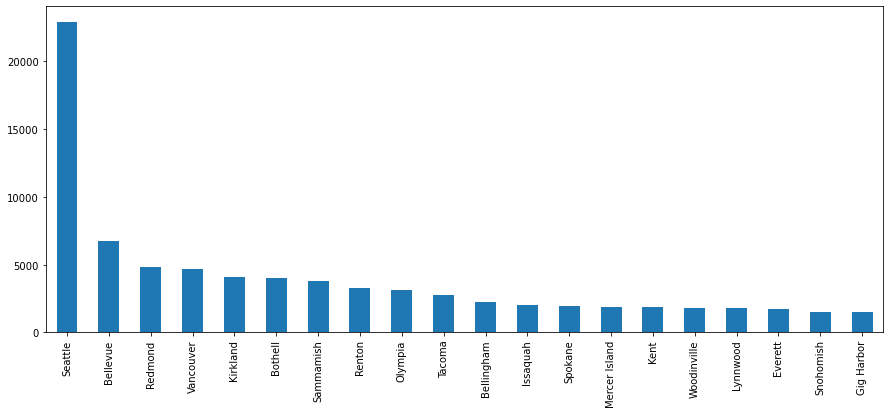

In [248]:
plt.figure(figsize=(15,6))
pd.Series(df6['City']).value_counts()[:20].plot(kind="bar")


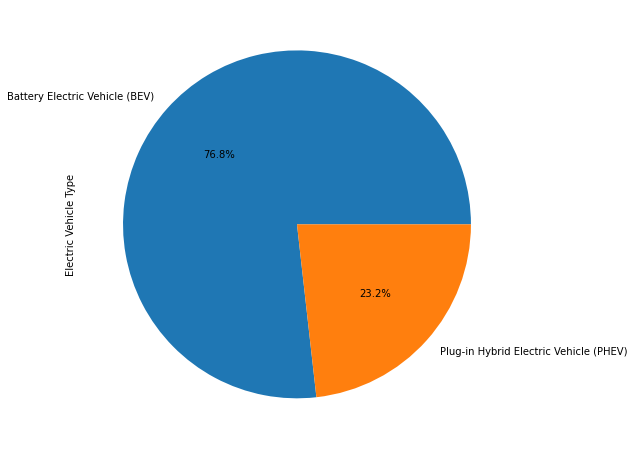

In [236]:
plt.figure(figsize = (8,8))
df6['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%')

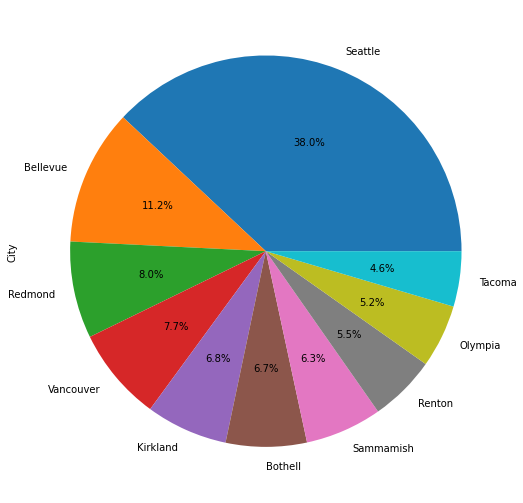

In [247]:
plt.figure(figsize=(9,9))
pd.Series(df6['City']).value_counts()[:10].plot(kind="pie",autopct='%1.1f%%')